# Q1)

In [1]:
#load the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
tf.debugging.set_log_device_placement(False) 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Generating reproducible results from same code
tf.random.set_seed(14) 

In [3]:
raw = pd.read_csv("gas_turbines.csv")
raw.head() 
#TEY is the variable we should predict.

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
df = raw.copy() 
df = df.drop(['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)
df.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [6]:
df.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


In [7]:
X =df.iloc[:,:-1]
Y = df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [8]:
y_train=np.reshape(y_train.to_numpy(), (-1,1)) 
y_test=np.reshape(y_test.to_numpy(), (-1,1)) 

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)

print(scaler_x.fit(X_test))
xtest_scale=scaler_x.transform(X_test)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [10]:
len(xtrain_scale)

10527

# building neural network model


In [11]:
# Create your first MLP in Keras
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [12]:
# create model
model1 = Sequential()
model1.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model1.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model1.add(Dense(1, activation='linear'))
# Compile model
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])
# Fit the model
hist1 = model1.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)
#At epoch 50, mse and mae just keeps oscillating back and forth

Epoch 1/100
48/48 [==============================] - 1s 9ms/step - loss: 0.0724 - mse: 0.0724 - mae: 0.2082 - val_loss: 0.0473 - val_mse: 0.0473 - val_mae: 0.1625
Epoch 2/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0461 - mse: 0.0461 - mae: 0.1558 - val_loss: 0.0460 - val_mse: 0.0460 - val_mae: 0.1540
Epoch 3/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - mae: 0.1540 - val_loss: 0.0455 - val_mse: 0.0455 - val_mae: 0.1560
Epoch 4/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0447 - mse: 0.0447 - mae: 0.1541 - val_loss: 0.0450 - val_mse: 0.0450 - val_mae: 0.1578
Epoch 5/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0438 - mse: 0.0438 - mae: 0.1559 - val_loss: 0.0436 - val_mse: 0.0436 - val_mae: 0.1571
Epoch 6/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0428 - mse: 0.0428 - mae: 0.1572 - val_loss: 0.0428 - val_mse: 0.0428 - val_mae: 0.1595
Epoch 7/100
48/48 [===

In [13]:
model1.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 2106)              10530     
                                                                 
 dense_2 (Dense)             (None, 1)                 2107      
                                                                 
Total params: 12,653
Trainable params: 12,653
Non-trainable params: 0
_________________________________________________________________


In [14]:
y_predict = model1.predict(xtest_scale)

141/141 [==============================] - 0s 900us/step


In [15]:
print(hist1.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [16]:
hist1_df = pd.DataFrame(hist1.history)
hist1_df["epoch"]=hist1.epoch
hist1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.038568,0.038568,0.153775,0.039253,0.039253,0.157169,95
96,0.038988,0.038988,0.156832,0.039362,0.039362,0.156031,96
97,0.038637,0.038637,0.155428,0.039952,0.039952,0.158820,97
98,0.038407,0.038407,0.154242,0.039245,0.039245,0.156319,98
99,0.038329,0.038329,0.154138,0.039465,0.039465,0.156183,99


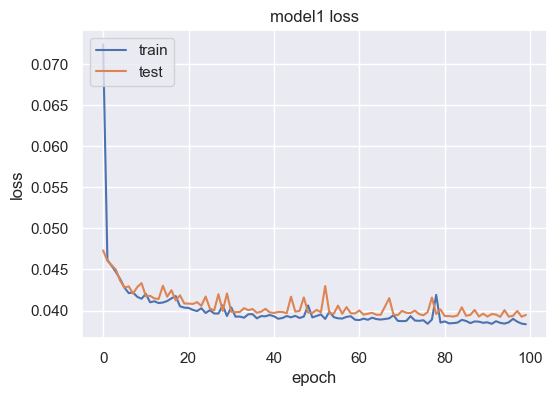

In [17]:
# summarize history for Loss

sns.set(rc={'figure.figsize':(6,4)})

plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

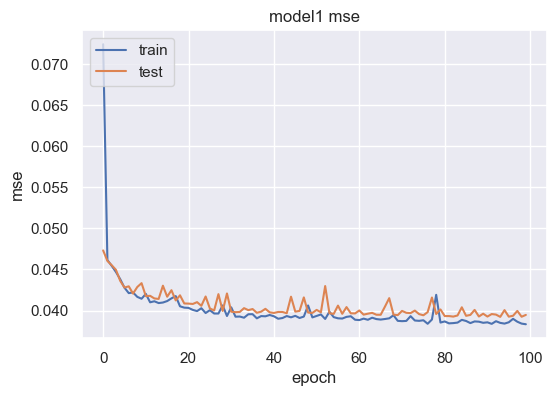

In [18]:
# summarize history for loss
plt.plot(hist1.history['mse'])
plt.plot(hist1.history['val_mse'])
plt.title('model1 mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

# Q2)
PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [19]:
#load the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import tensorflow as tf
tf.debugging.set_log_device_placement(False) 
import warnings
warnings.filterwarnings('ignore')

In [20]:
tf.random.set_seed(14) 

In [21]:
forest=pd.read_csv('forestfires.csv')
forest.head()


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [22]:
df = forest.copy() #Removing the dummies at this time
df.drop(df.columns[11:30],axis=1,inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [24]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [25]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [26]:
df.month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [27]:
 #  remove the bias.
df.size_category.value_counts() 

small    378
large    139
Name: size_category, dtype: int64

In [28]:
# label encoding

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df.month= label_encoder.fit_transform(df.month) 
df.day= label_encoder.fit_transform(df.day) 
df.size_category= label_encoder.fit_transform(df.size_category) 
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [29]:
# removing bias
# !pip install imbalanced-learn
from imblearn.combine import SMOTETomek
from collections import Counter

resamp = df.copy()
#SMOTEK TECHNIQUE

#Define dataset
a = resamp.iloc[:,:-1]
b = resamp.iloc[:,-1]

#Count before
print(Counter(b))

smt = SMOTETomek(sampling_strategy = 'auto')
a, b = smt.fit_resample(a, b)

#Count after
print(Counter(b)) #removed bias in dataset

Counter({1: 378, 0: 139})
Counter({1: 369, 0: 369})


In [30]:

X = a
Y = b
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [31]:
# Create your first MLP in Keras
import keras
from keras.models import Sequential
from keras.layers import Dense

In [32]:
# create model
model = Sequential()
model.add(Dense(14, input_dim=11, kernel_initializer='uniform', activation='relu'))
model.add(Dense(12,kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
hist = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=10)

Epoch 1/50
35/35 [==============================] - 1s 8ms/step - loss: 0.6857 - accuracy: 0.5797 - val_loss: 0.6942 - val_accuracy: 0.4795
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 0.6494 - accuracy: 0.6348 - val_loss: 0.6260 - val_accuracy: 0.7368
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 0.5749 - accuracy: 0.7101 - val_loss: 0.5707 - val_accuracy: 0.6725
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 0.4917 - accuracy: 0.7565 - val_loss: 0.5153 - val_accuracy: 0.6842
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8261 - val_loss: 0.3863 - val_accuracy: 0.8421
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 0.3162 - accuracy: 0.8841 - val_loss: 0.3015 - val_accuracy: 0.9532
Epoch 7/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2687 - accuracy: 0.8812 - val_loss: 0.2347 - val_accuracy: 0.9825
Epoch 8/50
35/35 [==

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 833us/step - loss: 0.0439 - accuracy: 0.9820


In [34]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [35]:
hist_df = pd.DataFrame(hist.history)
hist_df["epoch"]=hist.epoch
hist_df.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
45,0.018391,0.994203,0.019072,0.994152,45
46,0.155928,0.947826,0.069387,0.982456,46
47,0.093597,0.962319,0.018375,0.994152,47
48,0.058065,0.982609,0.079258,0.976608,48
49,0.057981,0.971014,0.016501,0.994152,49


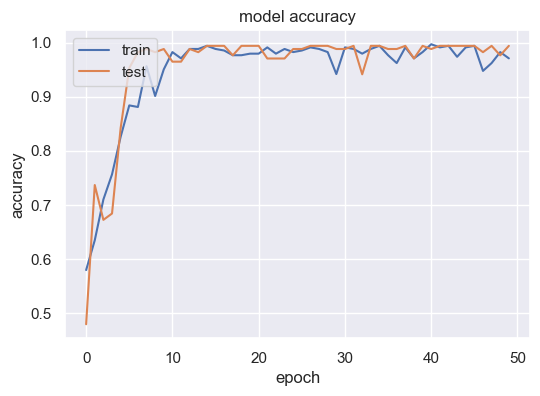

In [36]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

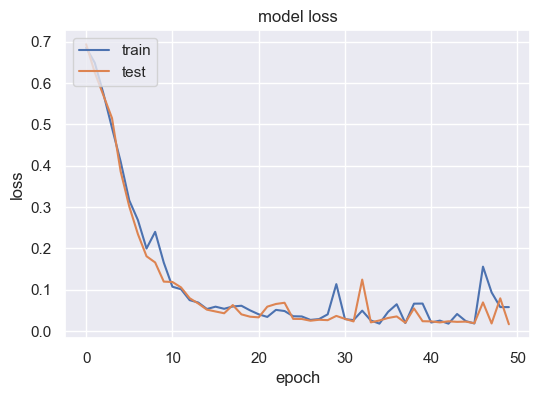

In [37]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [38]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [39]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [40]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [41]:
from keras.layers import Dropout

# Defining the model

def create_model2(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(14,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(12,input_dim = 14,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,kernel_initializer='uniform',activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model2 = KerasClassifier(build_fn = create_model2,verbose = 0,batch_size = 20,epochs = 50)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids2 = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid2 = GridSearchCV(estimator = model2,param_grid = param_grids2,cv = KFold(),verbose = 10)
grid_result2 = grid2.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.993 total time=   2.3s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   2.4s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.966 total time=   3.1s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.973 total time=   2.7s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.993 total time=   2.7s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [42]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means2 = grid_result2.cv_results_['mean_test_score']
stds2 = grid_result2.cv_results_['std_test_score']
params2 = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means2, stds2, params2):
  print('{},{} with: {}'.format(mean, stdev, param))
#Best score for Dropout rate = 0.2 and learning rate is 0.001

Best : 0.9864772915840149, using {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9850891590118408,0.013130443693776092 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9647913336753845,0.0188171761011196 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9824048519134522,0.01390055969218716 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9851075530052185,0.013094284104354486 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9689005255699158,0.03433363786712941 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9674572587013245,0.016340623421390227 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9864772915840149,0.0141687080138675 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9837562084197998,0.012521060454488501 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.909082555770874,0.0794270650596458 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [43]:
# Defining the model

def create_model3(activation_function,init):
    model = Sequential()
    model.add(Dense(14,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(12,input_dim = 14,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model3 = KerasClassifier(build_fn = create_model3,verbose = 0,batch_size = 20,epochs = 50)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids3 = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid3 = GridSearchCV(estimator = model3,param_grid = param_grids3,cv = KFold(),verbose = 10)
grid_result3 = grid3.fit(X_standardized,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.027 total time=   3.4s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.703 total time=   3.1s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.493 total time=   3.0s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.585 total time=   3.0s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.170 total time=   3.0s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [44]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means3 = grid_result3.cv_results_['mean_test_score']
stds3 = grid_result3.cv_results_['std_test_score']
params3 = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means3, stds3, params3):
  print('{},{} with: {}'.format(mean, stdev, param))
#best activation function in our case would be Relu and Kernel Initializer is Uniform

Best : 0.9932248592376709, using {'activation_function': 'tanh', 'init': 'uniform'}
0.39561500288546086,0.2555160363808267 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.38623827397823335,0.25083865643315434 with: {'activation_function': 'softmax', 'init': 'normal'}
0.34402463436126707,0.29690727723261867 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9878194570541382,0.008966687978234055 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9905221462249756,0.006901471934938278 with: {'activation_function': 'relu', 'init': 'normal'}
0.19897959232330323,0.18505326360179106 with: {'activation_function': 'relu', 'init': 'zero'}
0.9932248592376709,0.008561299587541043 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9932248592376709,0.008561299587541043 with: {'activation_function': 'tanh', 'init': 'normal'}
0.20168229937553406,0.18937937000158478 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9905129671096802,0.01180621094592284 with: {'

In [45]:
# Defining the model

def create_model4(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model4 = KerasClassifier(build_fn = create_model4,verbose = 0,batch_size = 20,epochs = 50)

# Define the grid search parameters

neuron1 = [4,8,14]
neuron2 = [4,8,12]

# Make a dictionary of the grid search parameters

param_grids4 = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid4 = GridSearchCV(estimator = model4,param_grid = param_grids4,cv = KFold(),verbose = 10)
grid_result4 = grid4.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.993 total time=   2.7s
[CV 2/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.973 total time=   2.2s
[CV 3/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.966 total time=   2.1s
[CV 4/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.898 total time=   2.2s
[CV 5/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.776 total time=   2.3s
[CV 1/5; 2/9] START neuron1=4, neuron2=8........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=8;,

In [46]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result4.best_score_,grid_result4.best_params_))
means4 = grid_result4.cv_results_['mean_test_score']
stds4 = grid_result4.cv_results_['std_test_score']
params4 = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means4, stds4, params4):
  print('{},{} with: {}'.format(mean, stdev, param))

#Best results are Neuron 1 = 4 and Neuron 2 = 4

Best : 0.9891708016395568, using {'neuron1': 14, 'neuron2': 12}
0.9211803555488587,0.07957735951376728 with: {'neuron1': 4, 'neuron2': 4}
0.9769442915916443,0.017491106327921783 with: {'neuron1': 4, 'neuron2': 8}
0.9714929103851319,0.02834919007771639 with: {'neuron1': 4, 'neuron2': 12}
0.9823588967323303,0.014636591605595165 with: {'neuron1': 8, 'neuron2': 4}
0.9864405274391175,0.012834705212931593 with: {'neuron1': 8, 'neuron2': 8}
0.9864405274391175,0.009575145106024547 with: {'neuron1': 8, 'neuron2': 12}
0.9810443162918091,0.014423404827197889 with: {'neuron1': 14, 'neuron2': 4}
0.9891707897186279,0.008098926394220147 with: {'neuron1': 14, 'neuron2': 8}
0.9891708016395568,0.00917079269770246 with: {'neuron1': 14, 'neuron2': 12}


In [47]:
# Defining the model

def create_model_fnl():
    model = Sequential()
    model.add(Dense(4,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,input_dim = 4,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model
model_fnl = KerasClassifier(build_fn = create_model_fnl,verbose = 0,batch_size = 20,epochs = 50)
#Making training and Testing Data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_standardized,Y, test_size = 0.3)
# Fitting the model
hist2 = model_fnl.fit(X_train_1,y_train_1)

In [48]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
def report_model(model):
    model_preds = model.predict(X_test_1)
    print(confusion_matrix(y_test_1,model_preds))
    print(classification_report(y_test_1,model_preds))
report_model(model_fnl)

7/7 [==============================] - 0s 0s/step
[[106   8]
 [  0 108]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       114
           1       0.93      1.00      0.96       108

    accuracy                           0.96       222
   macro avg       0.97      0.96      0.96       222
weighted avg       0.97      0.96      0.96       222

